# Sanity Check on Classical Gauge Code

In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("AdditionalQubitFunctions.jl")

classical_gauge_stab (generic function with 1 method)

In [2]:
# Some useful Contants, often used as Global variables in many methods 
# This is bad coding practice, but alas, will fix it in the future!

L, P_A, P_B, P_C, P_D, S, r_A, r_B, r_C, r_AB, r_BC, r_ABC = topological_partitioning(4);

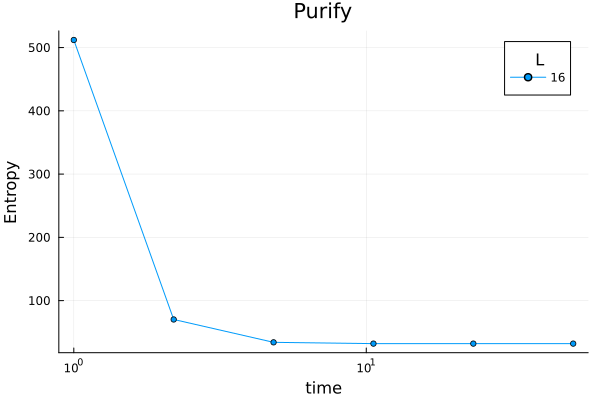

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 512.0  70.16  34.02  32.0  32.0  32.0

In [3]:
# Unwrap the main function to be run interactively

p_anyon = 0 # The change of applying an anyon of a given type vs a TC stabiliser!
p_tc = 1 - p_anyon
stab_distro_e = Categorical([p_tc/2, p_tc/2, p_anyon/2, p_anyon/2, 0, 0, 0, 0]) # In this case we condense e particles!
stab_distro_m = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon/2, p_anyon/2, 0, 0]) # In this case we condense m particles!
stab_distro_f = Categorical([p_tc/2, p_tc/2, 0, 0, 0, 0, p_anyon/2, p_anyon/2]) # In this case we condense f particles!
stab_distro = stab_distro_f


nt = Int(5*1e1)  # total number of time steps to evolve
nmeasure = 6 # number of measurements (log-spaced in time)


# times at which to measure stuff
measure_ts = exp10.(range(0, log10(nt+1), length=nmeasure))

number_of_experiments = 100
entropies_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    # initial state is the maximally mixed state
    # since the package does not let you create an empty tableau, I defined the identity as the stabilizer, which is the same statement
    nbits = 2*L*L
    maximally_mixed_state = Stabilizer(zeros(UInt8, 1), # phases
                                    zeros(Bool, 1, nbits), # Z Tableau (as matrix of bool)
                                    zeros(Bool, 1, nbits) # X Tableau
                                    );
    z_polarised_state = Stabilizer(zeros(UInt8, nbits), # phases
                                    zeros(Bool, nbits, nbits), # X Tableau (as matrix of bool)
                                    Matrix(LinearAlgebra.I, nbits, nbits) # Z Tableau
                                    );

    # this is running the actual dynamics simulation (RENAME)
    entropy_t = run_measurement_only_dynamics_PURE!(MixedDestabilizer(maximally_mixed_state), # evolve this
                                            () -> classical_gauge_code(L, stab_distro),  # bind 
                                            nt,
                                            measure_ts)

    entropies_t[:, exp_index] = entropy_t

end


# plot entropy as function of time
p = plot(measure_ts, sum(entropies_t, dims=2)/number_of_experiments,
    title="Purify",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
(sum(entropies_t, dims=2)/number_of_experiments)'

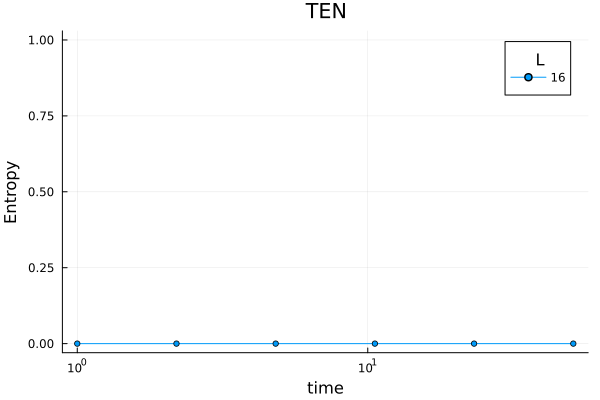

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0

In [4]:
# Unwrap the main function to be run interactively

p_anyon = 0 # The change of applying an anyon of a given type vs a TC stabiliser!
p_tc = 1 - p_anyon
stab_distro_e = Categorical([p_tc/2, p_tc/2, p_anyon/2, p_anyon/2, 0, 0, 0, 0]) # In this case we condense e particles!
stab_distro_m = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon/2, p_anyon/2, 0, 0]) # In this case we condense m particles!
stab_distro_f = Categorical([p_tc/2, p_tc/2, 0, 0, 0, 0, p_anyon/2, p_anyon/2]) # In this case we condense f particles!
stab_distro = stab_distro_f


nt = Int(5*1e1)  # total number of time steps to evolve
nmeasure = 6 # number of measurements (log-spaced in time)


# times at which to measure stuff
measure_ts = exp10.(range(0, log10(nt+1), length=nmeasure))

number_of_experiments = 10
TENs_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    # initial state is the maximally mixed state
    # since the package does not let you create an empty tableau, I defined the identity as the stabilizer, which is the same statement
    nbits = 2*L*L
    maximally_mixed_state = Stabilizer(zeros(UInt8, 1), # phases
                                    zeros(Bool, 1, nbits), # Z Tableau (as matrix of bool)
                                    zeros(Bool, 1, nbits) # X Tableau
                                    );
    z_polarised_state = Stabilizer(zeros(UInt8, nbits), # phases
                                    zeros(Bool, nbits, nbits), # X Tableau (as matrix of bool)
                                    Matrix(LinearAlgebra.I, nbits, nbits) # Z Tableau
                                    );

    # this is running the actual dynamics simulation (RENAME)
    TEN_t = run_measurement_only_dynamics_TEN!(MixedDestabilizer(z_polarised_state), # evolve this
                                            () -> classical_gauge_code(L, stab_distro),  # bind 
                                            nt,
                                            measure_ts)

    TENs_t[:, exp_index] = TEN_t

end


# plot entropy as function of time
p = plot(measure_ts, sum(TENs_t, dims=2)/number_of_experiments,
    title="TEN",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
(sum(TENs_t, dims=2)/number_of_experiments)'

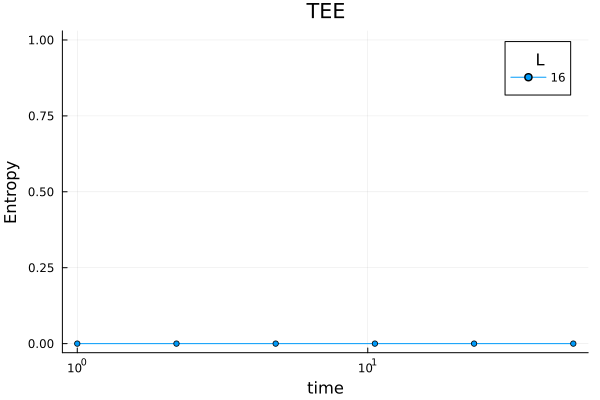

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0

In [5]:
# Unwrap the main function to be run interactively

p_anyon = 0 # The change of applying an anyon of a given type vs a TC stabiliser!
p_tc = 1 - p_anyon
stab_distro_e = Categorical([p_tc/2, p_tc/2, p_anyon/2, p_anyon/2, 0, 0, 0, 0]) # In this case we condense e particles!
stab_distro_m = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon/2, p_anyon/2, 0, 0]) # In this case we condense m particles!
stab_distro_f = Categorical([p_tc/2, p_tc/2, 0, 0, 0, 0, p_anyon/2, p_anyon/2]) # In this case we condense f particles!
stab_distro = stab_distro_f


nt = Int(5*1e1)  # total number of time steps to evolve
nmeasure = 6 # number of measurements (log-spaced in time)


# times at which to measure stuff
measure_ts = exp10.(range(0, log10(nt+1), length=nmeasure))

number_of_experiments = 10
TEEs_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    # initial state is the maximally mixed state
    # since the package does not let you create an empty tableau, I defined the identity as the stabilizer, which is the same statement
    nbits = 2*L*L
    maximally_mixed_state = Stabilizer(zeros(UInt8, 1), # phases
                                    zeros(Bool, 1, nbits), # Z Tableau (as matrix of bool)
                                    zeros(Bool, 1, nbits) # X Tableau
                                    );
    z_polarised_state = Stabilizer(zeros(UInt8, nbits), # phases
                                    zeros(Bool, nbits, nbits), # X Tableau (as matrix of bool)
                                    Matrix(LinearAlgebra.I, nbits, nbits) # Z Tableau
                                    );

    # this is running the actual dynamics simulation (RENAME)
    TEE_t = run_measurement_only_dynamics_TEE!(MixedDestabilizer(z_polarised_state), # evolve this
                                            () -> classical_gauge_code(L, stab_distro),  # bind 
                                            nt,
                                            measure_ts)

    TEEs_t[:, exp_index] = TEE_t

end


# plot entropy as function of time
p = plot(measure_ts, sum(TEEs_t, dims=2)/number_of_experiments,
    title="TEE",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
(sum(TEEs_t, dims=2)/number_of_experiments)'